In [4]:
from tqdm import trange, tqdm_notebook
from sklearn.datasets import fetch_20newsgroups
from time import sleep

categories = ['comp.graphics','sci.space']
for i in trange(4):
    sleep(0.01)
    
posts = fetch_20newsgroups(subset='train', categories=categories,
                           shuffle=True, random_state=42,
                           remove=('headers','footers','quotes'))

100%|██████████| 4/4 [00:00<00:00, 94.45it/s]


Done


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(posts.data)

In [6]:
from sklearn.feature_selection import chi2
# compute chi2 for each feature
chi2score = chi2(X, posts.target)[0]
print(chi2(X, posts.target))

(array([ 0.53235333, 60.32462013,  1.96964587, ...,  0.98482293,
        1.96964587,  2.03082192]), array([4.65619150e-01, 8.04350110e-15, 1.60485456e-01, ...,
       3.21010995e-01, 1.60485456e-01, 1.54137230e-01]))


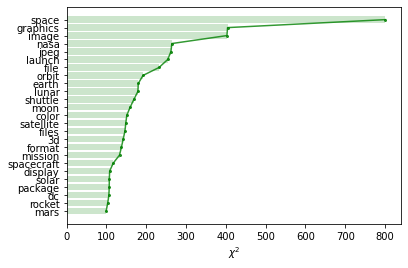

In [7]:
from pylab import barh, plot, yticks, show, grid, xlabel, figure
wscores = zip(vectorizer.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-25:]))

x = range(len(topchi2[1]))
labels = topchi2[0]
barh(x , topchi2[1], align='center', alpha=.2, color='g')
plot(topchi2[1], x,'-o', markersize=2, alpha=.8, color='g')
yticks(x ,labels)
xlabel('$\chi^2$')
show()

In [20]:
# print(posts.data)
# print(posts.filenames)
# print(posts.target_names)
# print(posts.target)
# print(posts.DESCR)

(0, '\nI usually use "Algorithms for graphics and image processing" by\nTheodosios Pavlidis, but other people here got them same idea and now\n3 of 4 copies in the libraries have been stolen!\n\nAnother reference is "Digital Image Processing" by Gonzalez and\nWintz/Wood, which is widely available but a little expensive ($55\nhere- I just checked today).')
(1, "\n\n\n\n\n\nIt still applies, except the astronomy these days is Very Long Baseline\nRadio Astronomy coupled to GPS and Satellite Laser Ranging. The data\nfrom NASA's and the Naval Observatory's (among others) is a vital \nsource of data for studies into crustal dynamics, Earth rotation, and\npurturbations. Every time there is a leap second added to the New Year,\nremember the military and science are still co-habiting nicely. The\nsame VLBI was used to track Gallileo as it passed the Earth, and used\nso little fuel that it can afford to observe Ida. \n ")
(0, 'I am currently using POVRay on Mac and was wondering if anyone in net